In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.isnull().sum().sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
airline                             0
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
text                                0
retweet_count                       0
name                                0
tweet_created                       0
dtype: int64

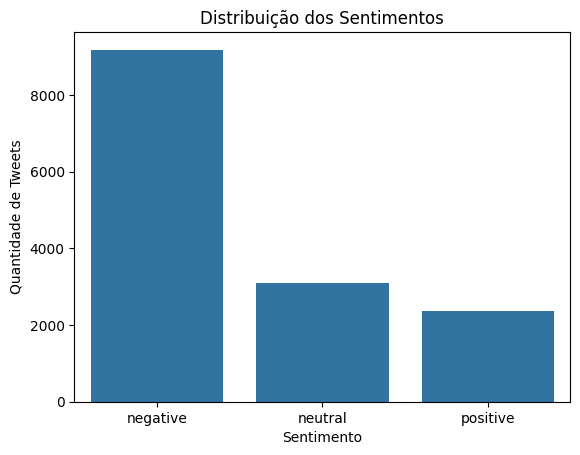

In [4]:
sns.countplot(data=df, x='airline_sentiment', order=df['airline_sentiment'].value_counts().index)
plt.title("Distribuição dos Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade de Tweets")
plt.show()

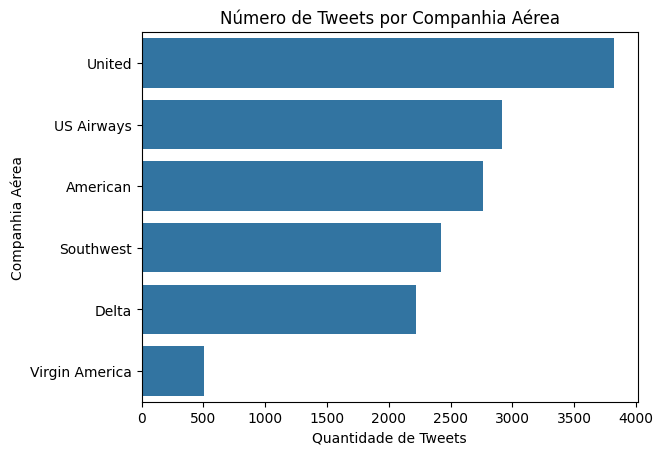

In [5]:
sns.countplot(data=df, y='airline', order=df['airline'].value_counts().index)
plt.title("Número de Tweets por Companhia Aérea")
plt.xlabel("Quantidade de Tweets")
plt.ylabel("Companhia Aérea")
plt.show()


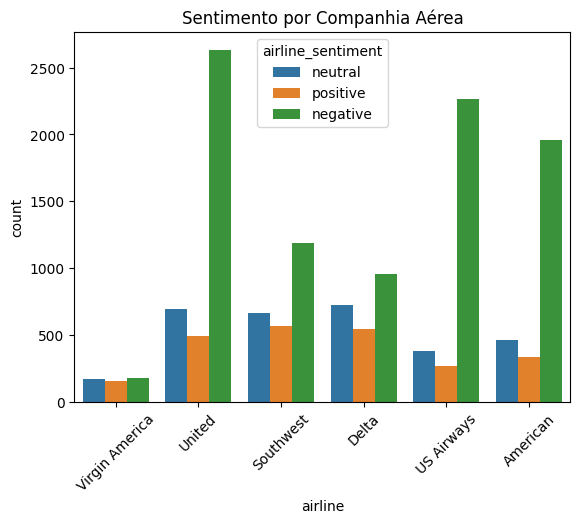

In [6]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')
plt.title("Sentimento por Companhia Aérea")
plt.xticks(rotation=45)
plt.show()


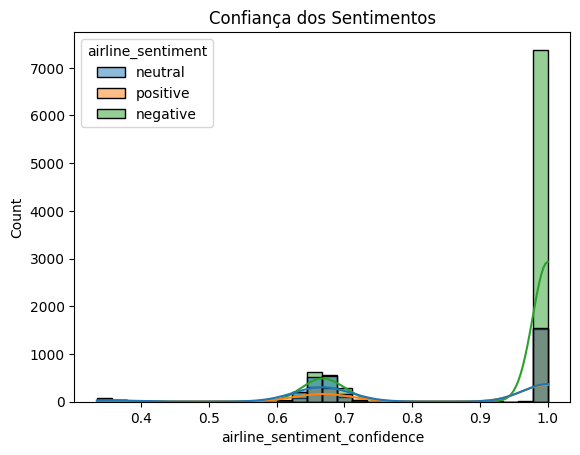

In [7]:
sns.histplot(data=df, x='airline_sentiment_confidence', hue='airline_sentiment', kde=True, bins=30)
plt.title("Confiança dos Sentimentos")
plt.show()


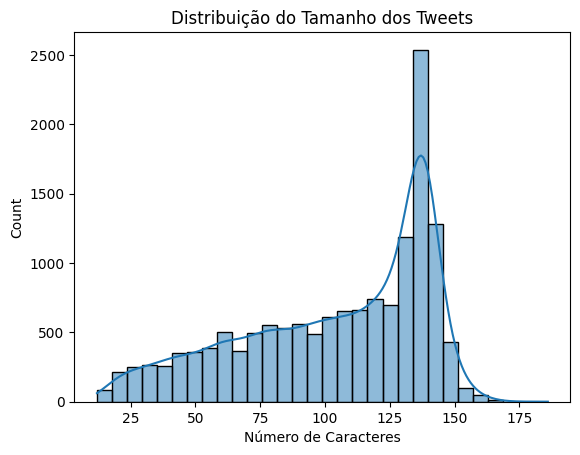

In [8]:
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribuição do Tamanho dos Tweets")
plt.xlabel("Número de Caracteres")
plt.show()


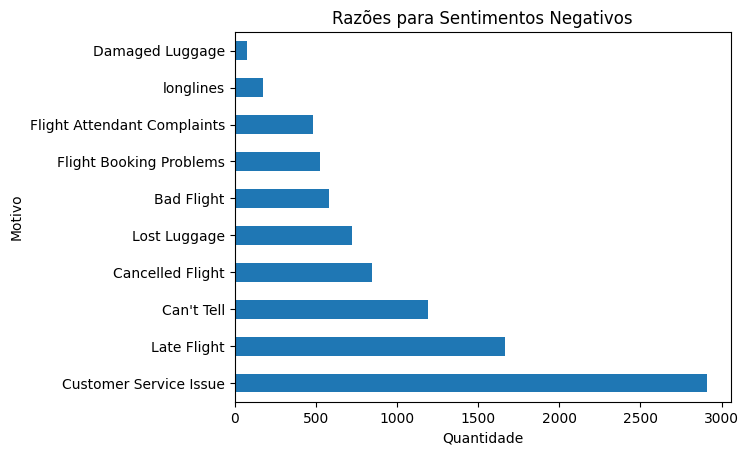

In [9]:
df['negativereason'].value_counts().plot(kind='barh')
plt.title("Razões para Sentimentos Negativos")
plt.xlabel("Quantidade")
plt.ylabel("Motivo")
plt.show()


## Sintese

#### Dados Ausentes
- negativereason_gold, airline_sentiment_gold e tweet_coord estão quase completamente ausentes.
- A coluna negativereason também tem muitos valores faltando, o que indica que nem todos os tweets negativos têm uma justificativa registrada.
- Pode ser necessário remover essas colunas ou tratá-las separadamente, dependendo do modelo.

### Distribuição dos Sentimentos
- A maioria dos tweets tem sentimento negativo, seguido de neutro e por fim positivo.
- Isso é comum em análises de companhias aéreas, pois usuários tendem a usar o Twitter para reclamações.

### Tweets por Companhia Aérea
- A United é a mais mencionada, seguida por US Airways e American.
- A Virgin America tem bem menos tweets, o que pode impactar a generalização de um modelo treinado com dados desbalanceados por companhia.

### Sentimento por Companhia Aérea
- US Airways e United concentram muitos tweets negativos.
- A Virgin America aparece com maior proporção de positivos, o que pode indicar boa reputação entre os usuários do dataset.

### Confiança dos Sentimentos
- A maioria das classificações de sentimento tem confiança acima de 0.8.
- A distribuição da confiança é diferente para cada classe, com os negativos sendo os mais confiáveis (em média).

### Comprimento dos Tweets
- A maioria dos tweets tem entre 80 e 140 caracteres, com um pico em torno de 120.
- Como o modelo BERT aceita até 512 tokens, dificilmente será necessário truncar muito conteúdo.

### Razões para Tweets Negativos
- Os principais motivos negativos são Customer Service Issue, Late Flight e Cancelled Flight.
- Esses insights ajudam a entender a natureza dos sentimentos negativos e podem ser usados para análises mais detalhadas ou classificação multiclasse futura.